# Fine-tuning

Based on the pre-training of the above two tasks, the vector representation of specific sub-words integrates two-way context information, and the vector representation of [CLS] also encodes the relationship between sentence pairs on the basis of combining the entire sentence information. In the fine-tuning stage, for different downstream tasks, only task-related output processing needs to be added to the pre-trained model, and the labeled data in the field is used for retraining, so that the model can better fit the distribution of task data.
The following figure shows the input and output of several common tasks:

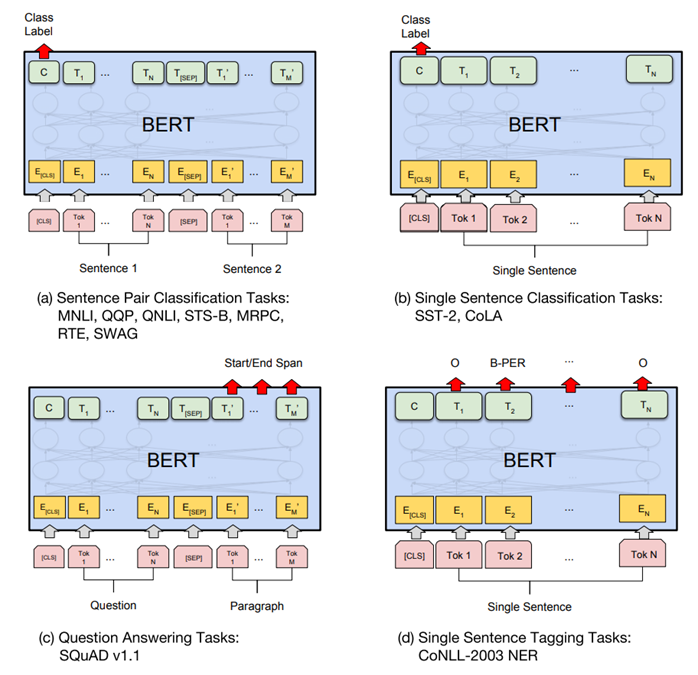

(A) For sentence-pair classification tasks, such as MNLI, QQP, QNLI, STS-B, MRPC, RTE, and SWAG, enter sentence 1 and sentence 2, use the semantic representation vector CC at the beginning of the sentence [CLS] [CLS], and then A softmax classification layer performs classification.


(B) For single sentence classification tasks, such as SST-2 and CoLA, input sentence 1, sentence 2 is empty, and also predict according to the final representation vector CC of [CLS].


(C) For the question and answer task SQuAD v1.1, answer the question based on the paragraph Paragraph and predict the start/end span of the answer. sentence 1 is Question and sentense 2 is the reference Pragraph. Slightly special is that a vector of SS and EE is added in the fine-tuning stage, and the probability that t_iti is the beginning of the answer is
$P_i = \frac{e^{S \cdot T_i}}{\sum_j e^{S \cdot T_j}}$
Similarly, the probability that t_iti is the end of the answer is
$P_i = \frac{e^{E \cdot T_i}}{\sum_j e^{E \cdot T_j}}$
In the fine-tuning stage, the objective function of training is to maximize the sum of the probability of the starting position of the true answer. In the final prediction, the predicted answer span is
$argmax_{i \leq j} {S \cdot T_i + E \cdot T_j}$

(D) For a single sentence tagging task, such as CoNLL-2003 NER, it actually performs multiple classifications on each sub-word, and finally gets a sequence of tagging results.

$Author$: Nelson LIN

$Email$: nelsonlin0321@outlook.com